In [1]:
#importing all the libraries
import warnings
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.metrics import r2_score,accuracy_score,f1_score

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [4]:
#Importing the Dataset
df=pd.read_csv("/content/advertising.csv")

In [5]:
#Now we want to check which information our data have
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
#Then we described our Dataset using Count , mean and standard deviation
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
#Then we remove the null values from our Dataset
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
#Then we check the shape of our Dataset
df.shape

(200, 4)

In [10]:
df.duplicated().sum()

0

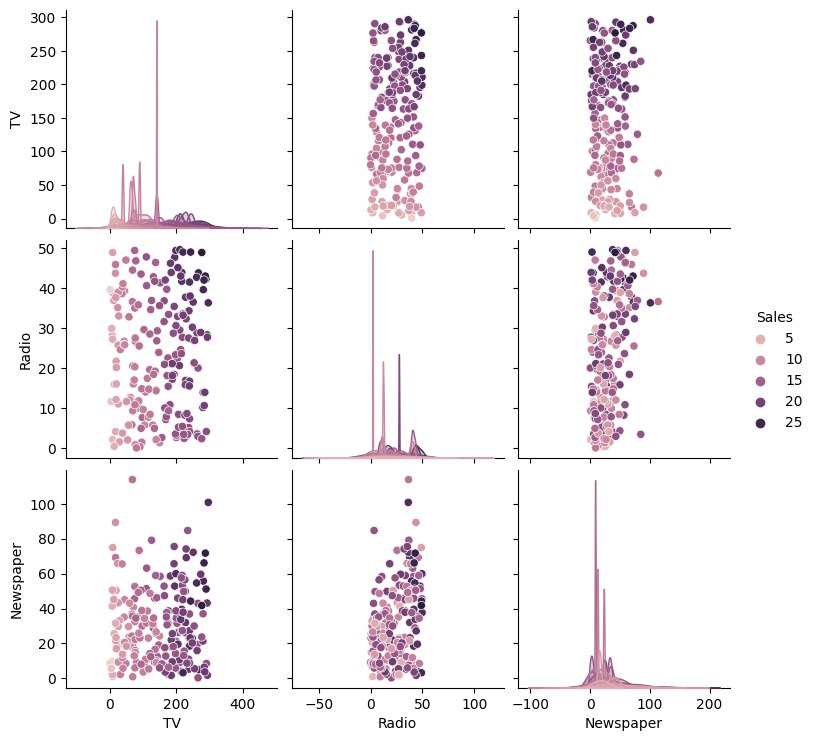

In [11]:
#Then we plot the sales Data according to the TV,Radio and Newspaper
sns.pairplot(df, hue = 'Sales')

<Axes: >

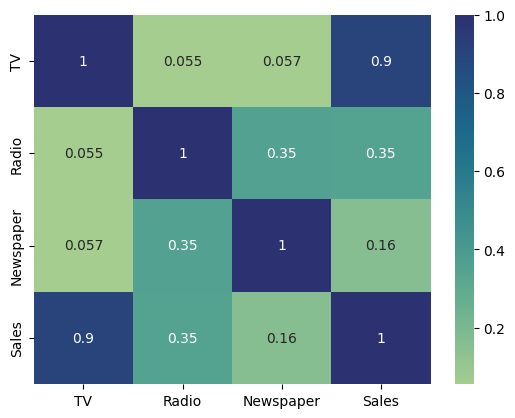

In [12]:
#After that we plot the heatmap
sns.heatmap(df.corr(), cmap = 'crest', annot = True)

<Axes: ylabel='count'>

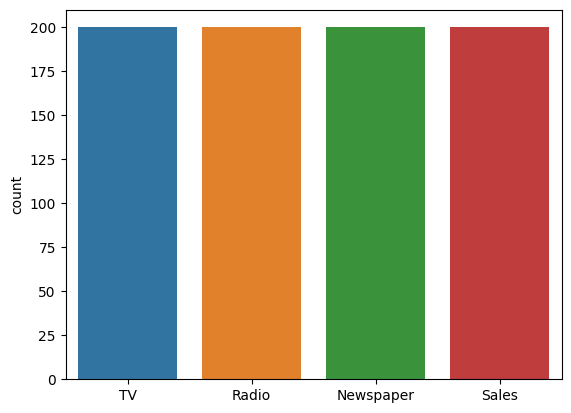

In [13]:
#then we count plot all the variables
sns.countplot(data = df)

<ipython-input-14-28891c47cd60>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, kde = True)


<Axes: ylabel='Density'>

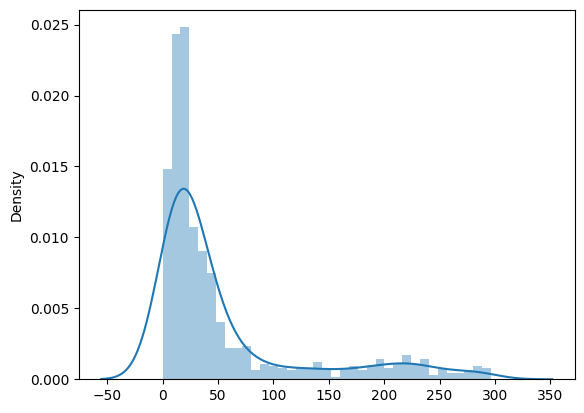

In [14]:
#Then we plot according to the density
sns.distplot(df, kde = True)

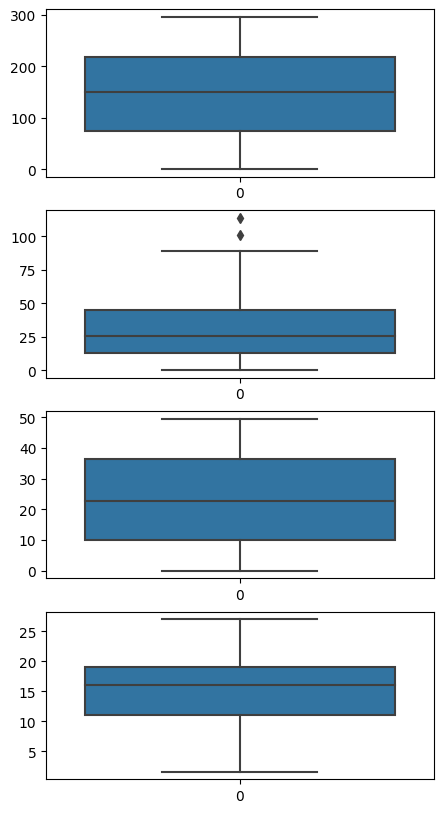

In [15]:
#then we plot the candle graph of the Data
fig, axs = plt.subplots(4, figsize = (5,10))
plt1 = sns.boxplot(df['TV'], ax = axs[0], )
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt4 = sns.boxplot(df['Sales'], ax = axs[3])
plt.show()

In [16]:
#We drop the Sales column from the x axis and put it on y axis
X = df.drop(columns=['Sales'], axis = 1)
Y = df['Sales']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [18]:
X_train.shape

(160, 3)

In [19]:
scaler = StandardScaler()

In [20]:
#Then we perform the Scaler Transform of the Data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled

array([[-4.04248386e-01, -1.02823707e+00, -3.37675384e-01],
       [ 3.20607716e-01, -9.19827737e-01, -1.16143931e+00],
       [-1.27051084e+00,  2.59123702e-01,  2.54250789e-01],
       [-1.04235941e+00, -6.96233499e-01, -5.74445854e-01],
       [ 8.79103401e-01, -1.38734296e+00, -7.07629243e-01],
       [-1.32873699e+00, -1.29926038e+00, -7.96418169e-01],
       [-9.43731452e-01, -4.65863678e-01,  5.35415722e-01],
       [-3.23140256e-02,  6.94073782e-02, -5.34984109e-01],
       [-5.39713297e-01, -1.16374872e+00,  2.19721762e-01],
       [-8.75998996e-01,  3.13328366e-01, -6.87898371e-01],
       [-8.53421511e-01,  1.62101588e+00,  2.24654481e-01],
       [ 2.18414888e-01, -1.06889056e+00, -8.45745350e-01],
       [-1.67928215e+00,  1.76330312e+00,  2.22240532e+00],
       [-1.68997675e+00,  1.08574483e+00,  1.01882210e+00],
       [-8.74810708e-01, -1.49575229e+00, -7.47090988e-01],
       [-2.45017701e-01, -1.16374872e+00,  6.68075010e-02],
       [-9.10459368e-01, -3.98107848e-01

In [32]:
#Then we make an ANN model that we will use for the sale prediction
model = Sequential()

model.add(Dense(128, activation = 'relu', input_dim = 3))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0,25))

model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0,25))

model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0,25))

model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(1, activation = 'linear'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

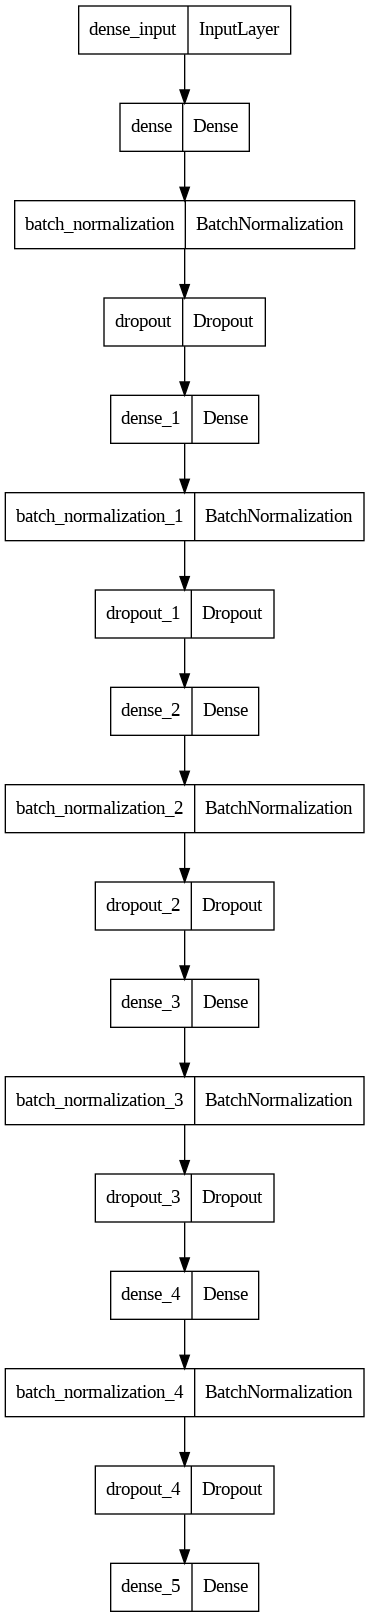

In [34]:
plot_model(model)

In [35]:
model.compile(optimizer='sgd', loss = 'mae', metrics = ['mae'])

In [36]:
call = EarlyStopping(patience=10, verbose=1)

In [37]:
output = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=1000, callbacks=call )

Epoch 1/1000
4/4 [==============================] - 2s 113ms/step - loss: 15.4293 - mae: 15.4293 - val_loss: 14.7758 - val_mae: 14.7758
Epoch 2/1000
4/4 [==============================] - 0s 19ms/step - loss: 15.3318 - mae: 15.3318 - val_loss: 14.6850 - val_mae: 14.6850
Epoch 3/1000
4/4 [==============================] - 0s 18ms/step - loss: 15.1711 - mae: 15.1711 - val_loss: 14.5919 - val_mae: 14.5919
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 15.1324 - mae: 15.1324 - val_loss: 14.5034 - val_mae: 14.5034
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 15.1235 - mae: 15.1235 - val_loss: 14.4117 - val_mae: 14.4117
Epoch 6/1000
4/4 [==============================] - 0s 16ms/step - loss: 15.0720 - mae: 15.0720 - val_loss: 14.3229 - val_mae: 14.3229
Epoch 7/1000
4/4 [==============================] - 0s 18ms/step - loss: 14.8668 - mae: 14.8668 - val_loss: 14.2299 - val_mae: 14.2299
Epoch 8/1000
4/4 [==============================] - 0s

In [38]:
pred_model = model.predict(X_test_scaled)

2/2 [==============================] - 0s 7ms/step


In [39]:
score_model = r2_score(y_test, pred_model)

In [40]:
score_model

0.9094610313438062

In [41]:
output.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

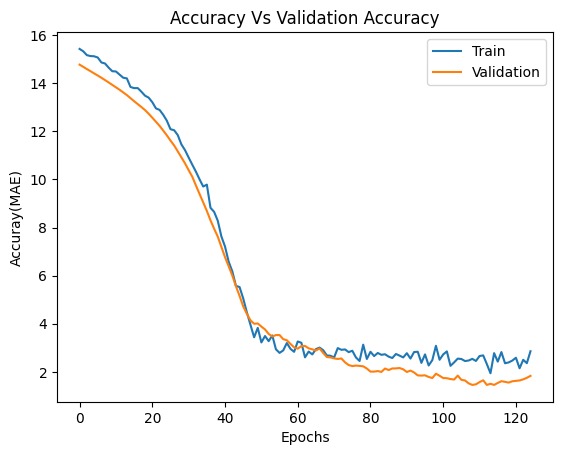

In [42]:
plt.plot(output.history['mae'])
plt.plot(output.history['val_mae'])
plt.title('Accuracy Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuray(MAE)')
plt.legend(['Train', 'Validation'])
plt.show()

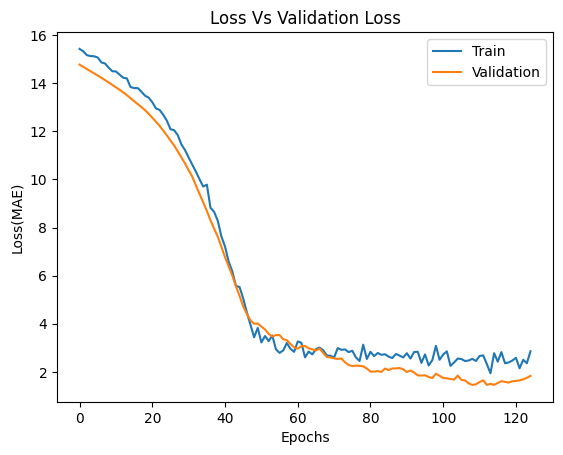

In [43]:
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Loss Vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss(MAE)')
plt.legend(['Train', 'Validation'])
plt.show()
